In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cleaned_v5.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_v5.csv'

In [ ]:
df.head()

In [ ]:
test = df[df.rating != 0]

## Problem:
province has some errors

In [ ]:
df.groupby(['province'])['price'].sum().sort_values()[::-1]



In [ ]:
to_modifiy = ['SaudiArabia',
             'West']

In [ ]:
df[df['province']  == to_modifiy[0]]['link']

In [ ]:
df.loc[446      ,'province'] = 'Eastern'

In [ ]:
df.loc[642      ,'province'] = 'Riyadh'

In [ ]:
df.loc[1080      ,'province'] = 'Mecca'

In [ ]:
df.loc[1147      ,'province'] = 'Mecca'

In [ ]:
df.loc[1148      ,'province'] = 'Mecca'

In [ ]:
df.loc[1337      ,'province'] = 'Mecca'

In [ ]:
df.loc[1358      ,'province'] = 'Mecca'

In [ ]:
df.loc[1635      ,'province'] = 'Riyadh'

In [ ]:
df.loc[1545      ,'province'] = 'Riyadh'

In [ ]:
df.loc[1652      ,'province'] = 'Riyadh'

In [ ]:
df.loc[1716      ,'province'] = 'Riyadh'

In [ ]:
df.loc[1858      ,'province'] = 'Tabuk'

In [ ]:
df.groupby(['province'])['price'].sum().sort_values()[::-1]

In [ ]:
df[df['province']  == to_modifiy[1]]['link']

In [ ]:
df.loc[851    ,'province'] = 'Mecca'

In [ ]:
df.groupby(['province'])['price'].count().sort_values()[::-1]

In [ ]:
prov = {
'Mecca':1,
'Riyadh':2,
'Eastern':3,
'Medina':4,
'Asir':5,
'AlQassim':6,
'Tabuk':7,
'Ha\'il':8  ,
'Al Bahah':9 ,
'Jizan':10} 

In [ ]:
df['province'].replace(prov, inplace=True)

In [ ]:
df.groupby(['province'])['price'].count().sort_values()[::-1]

In [ ]:
df.info(verbose=True, null_counts=True)

In [ ]:
df.head(5)

In [ ]:
df.to_csv('cleaned_v6.csv')

## EDA

In [24]:

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [ ]:
#test.iloc[:,:10]

In [ ]:
L = df.columns

[x for x in L if 'pool' in x]

In [ ]:
p = list(prov.keys())

In [ ]:
#fig, ax = plt.subplots()
#plt.figure(figsize=(25,7));
#ax.set_xticks(p) 
#sns.lineplot(x=prov[df.province], y=df.price)

In [ ]:
#plt.figure(figsize=(25,7));
#sns.catplot(x=df.pool, y=df.price, data = df)
#sns.catplot(x=df.tv, y=df.price, data = df)

In [ ]:
plt.figure(figsize=(25,7));
plt.hist(df.rating);

In [ ]:
plt.figure(figsize=(25,7));
plt.hist(df.price);

In [25]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [26]:
df = pd.read_csv('data_v9.csv', index_col=0)

In [27]:
df.shape

(1864, 105)

## Experiment 1 

In [28]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']

In [29]:
#x = list(x.columns)
#x.sort()
#x

In [30]:
model = LinearRegression()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [32]:
#cols = list(df.columns)
#for i in cols:
#    value = sum(df[i].isna()) 
#    if value!=0:
#        print(i)
    #else:
        #print(i)

In [33]:
#df.loc[1863, 'superhost'] = 0

In [34]:
m = model.fit(X_train, y_train)

In [35]:
m.score(X_test, y_test) * 100

34.566135965863445

In [36]:
y_pred = m.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_pred, y_test)

## Experiment 2
 with scaling

In [38]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

In [40]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)


In [41]:
m = LinearRegression()
m.fit(X_train_scaled,y_train)
m.score(X_test_scaled,y_test) * 100

34.55941581362653

In [42]:
mean_absolute_error(m.predict(X_test_scaled), y_test)

402.11583988493345

## Experiment 3
 with polynomial features

In [43]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'], inplace=False)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

In [44]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [45]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train_poly)
X_test_scaled = std.transform(X_test_poly)

In [46]:
lr_poly = LinearRegression()
lr_poly = lr_poly.fit(X_train_scaled, y_train)
lr_poly.score(X_test_scaled,y_test) * 100

-2.2861966871041417e+21

In [47]:
mean_absolute_error(lr_poly.predict(X_test_poly), y_test)

3.73003172978529e+16

## Experiment 4
 with feature Selection

In [48]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']
#X_train, X_test, y_train, y_test = train_test_split(x, 
#                                        y, test_size=0.2, random_state=40)

In [49]:
from sklearn.feature_selection import SelectKBest,f_regression

fs = SelectKBest(score_func=f_regression, k=25)

X_selected = fs.fit_transform(x, y)


cols = fs.get_support(indices=True)

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [50]:
x = x.iloc[:,cols]
y = df['price']


In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

In [52]:
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_test,y_test) * 100

33.84960911599458

In [53]:
mean_absolute_error(m.predict(X_test), y_test)

380.8419630774019

## Experiment 5
with Manual Grid Search for best number of features

In [54]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']

In [55]:
df.shape[1]

105

In [56]:
sz = df.shape[1] -1
scores = [0]*(sz-7)
mae_error = [0]*(sz-7)
num_of_features = [0]*(sz-7)


for i in range(1,sz-6):
    x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
    y = df['price']
    fs = SelectKBest(score_func=f_regression, k=i)
    X_selected = fs.fit_transform(x, y)
    cols = fs.get_support(indices=True)
    x = x.iloc[:,cols]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(x, 
                                            y, test_size=0.2, random_state=40)
    m = LinearRegression().fit(X_train,y_train)
    scores[i-1] = m.score(X_test,y_test) * 100
    mae_error[i-1] = mean_absolute_error(m.predict(X_test), y_test)
    num_of_features[i-1] = i


/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [57]:
scores[scores.index(max(scores))]

36.32524852538299

In [58]:
best_score = scores.index(max(scores))
best_score

62

In [59]:
mae_error.index(min(mae_error))

4

In [60]:
print(mae_error[4], scores[4])

356.24414128948195 35.36137989042557


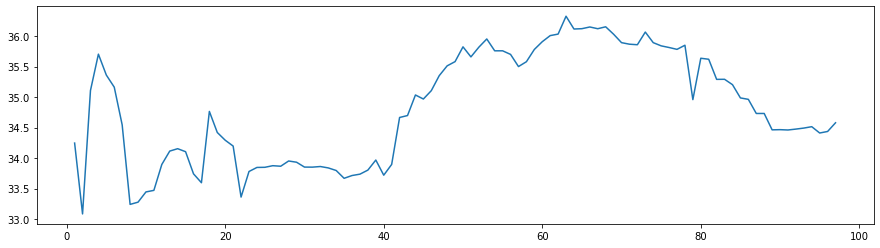

In [61]:
plt.figure(figsize=(15,4));
sns.lineplot(x=num_of_features,y=scores);

In [62]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']
fs = SelectKBest(score_func=f_regression, k=best_score)
X_selected = fs.fit_transform(x, y)
cols = fs.get_support(indices=True)
x = x.iloc[:,cols]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

m = LinearRegression().fit(X_train,y_train)
print('score', m.score(X_test,y_test) * 100)
print('mae', mean_absolute_error(m.predict(X_test), y_test))

score 36.032756552369975
mae 394.4275967064837


/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


## Exp 7
Ridge and Lasso

In [63]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']
fs = SelectKBest(score_func=f_regression, k=best_score)
X_selected = fs.fit_transform(x, y)
cols = fs.get_support(indices=True)
x = x.iloc[:,cols]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [64]:
alphas = np.linspace(0.001, 1,100)
kf = KFold(5, random_state=42, shuffle=True )

params = {'alpha':alphas}
gs = GridSearchCV(Lasso(), param_grid=params, cv=kf)
model = gs.fit(X_train, y_train)

In [65]:
print('score', model.score(X_test,y_test) * 100)
print('mae', mean_absolute_error(model.predict(X_test), y_test))

score 36.50024047047358
mae 383.2017860980757


# Ridge: 
    score 36.03332215368384
    mae 394.42269327788296

# Lasso
    score 36.50024047047358
    mae 383.2017860980756

# Elastic Net
    score 36.193263626919794
    mae 391.6534938751397


## Exp 8
remove outliers

In [66]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']
#X_train, X_test, y_train, y_test = train_test_split(x, 
#                                        y, test_size=0.2, random_state=40)

In [67]:
from numpy import mean
from numpy import std
from sklearn.feature_selection import SelectKBest, f_regression
data = y

data_mean, data_std = mean(y), std(y)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 28
Non-outlier observations: 1836


In [68]:
outliers_index = [i for i,x in zip(data.index, data) if x < lower or x > upper]
outliers_index[:5]

[449, 464, 466, 470, 495]

In [69]:
x_no_outliers = x.drop(index=outliers_index)
y_no_outliers = y.drop(index=outliers_index)

In [70]:
print(x.shape, x_no_outliers.shape)
print(y.shape[0], y_no_outliers.shape[0])

(1864, 99) (1836, 99)
1864 1836


In [71]:
alphas = np.linspace(0.001, 1,100)
kf = KFold(5, random_state=42, shuffle=True )

params = {'alpha':alphas}
gs = GridSearchCV(ElasticNet(), param_grid=params, cv=kf)
model = gs.fit(X_train, y_train)

In [72]:
fs = SelectKBest(score_func=f_regression, k=best_score)
X_selected = fs.fit_transform(x_no_outliers,  y_no_outliers)
cols = fs.get_support(indices=True)
x = x.iloc[:,cols]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x_no_outliers,  y_no_outliers
                                                    , test_size=0.2, random_state=40)

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [73]:
alphas = np.linspace(0.001, 1,100)
kf = KFold(5, random_state=42, shuffle=True )

params = {'alpha':alphas}
gs = GridSearchCV(ElasticNet(), param_grid=params, cv=kf)
model = gs.fit(X_train, y_train)

In [74]:
print('score', model.score(X_test,y_test) * 100)
print('mae', mean_absolute_error(model.predict(X_test), y_test))

score 45.87381133184274
mae 270.78518830541844


In [75]:
###########

In [76]:
sz = df.shape[1] -1
scores = [0]*(sz-7)
mae_error = [0]*(sz-7)
num_of_features = [0]*(sz-7)


for i in range(1,sz-6):
    x = x_no_outliers.copy(deep=True)
    y = y_no_outliers.copy(deep=True)
    fs = SelectKBest(score_func=f_regression, k=i)
    X_selected = fs.fit_transform(x, y)
    cols = fs.get_support(indices=True)
    x = x.iloc[:,cols]
    
    X_train, X_test, y_train, y_test = train_test_split(x, 
                                            y, test_size=0.2, random_state=40)
    m = LinearRegression().fit(X_train,y_train)
    scores[i-1] = m.score(X_test,y_test) * 100
    mae_error[i-1] = mean_absolute_error(m.predict(X_test), y_test)
    num_of_features[i-1] = i
best_score = scores.index(max(scores))
best_score

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


2

In [77]:
fs = SelectKBest(score_func=f_regression, k=best_score)
X_selected = fs.fit_transform(x_no_outliers,  y_no_outliers)
cols = fs.get_support(indices=True)
x = x.iloc[:,cols]
y = y_no_outliers
X_train, X_test, y_train, y_test = train_test_split(x_no_outliers,  y_no_outliers
                                                    , test_size=0.2, random_state=40)

/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [78]:
alphas = np.linspace(0.001, 1,100)
kf = KFold(5, random_state=42, shuffle=True )

params = {'alpha':alphas}
gs = GridSearchCV(ElasticNet(), param_grid=params, cv=kf)
model = gs.fit(X_train, y_train)

In [79]:
print('score', model.score(X_test,y_test) * 100)
print('mae', mean_absolute_error(model.predict(X_test), y_test))

score 45.87381133184274
mae 270.78518830541844


## EDA

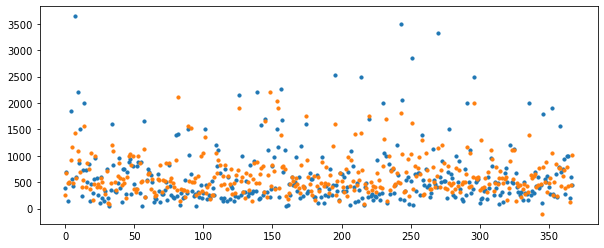

In [80]:
plt.figure(figsize=(10,4))
plt.scatter(range(y_test.shape[0]), y_test, s=10)
plt.scatter(range(y_test.shape[0]),model.predict(X_test),s=10)

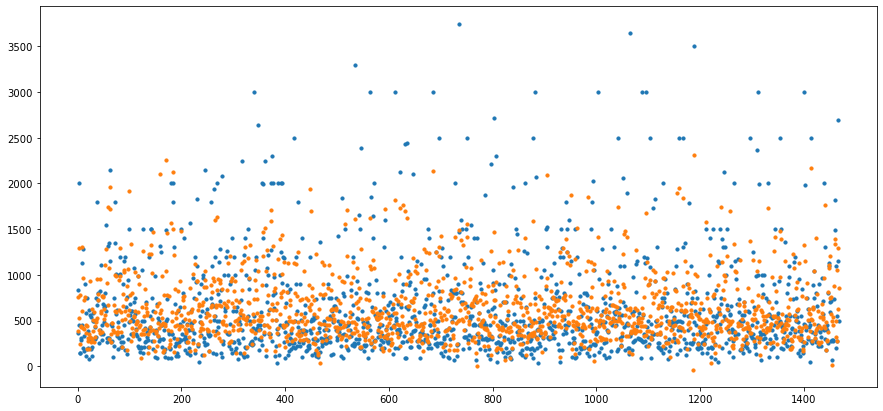

In [81]:
plt.figure(figsize=(15,7))
plt.scatter(range(y_train.shape[0]), y_train, s=10)
plt.scatter(range(model.predict(X_train).shape[0]),model.predict(X_train),s=10)

In [82]:
range(y_test.shape[0])

range(0, 368)

In [83]:
x_no_outliers.shape

(1836, 99)